In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import cv2
import torchvision
import torchvision.datasets as datasets
from torch.autograd import Variable
from PIL import Image

In [0]:
!unzip 'drive/My Drive/tt.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test_task/val/fp/71f790b3-6446-11ea-a74e-b42e996a643e_0.jpg  
  inflating: test_task/val/fp/71f790b3-6446-11ea-a74e-b42e996a643e_1.jpg  
  inflating: test_task/val/fp/72393b4d-643b-11ea-a74e-b42e996a643e_0.jpg  
  inflating: test_task/val/fp/723973a2-643f-11ea-a74e-b42e996a643e_0.jpg  
  inflating: test_task/val/fp/723973a2-643f-11ea-a74e-b42e996a643e_1.jpg  
  inflating: test_task/val/fp/7239fb60-6443-11ea-a74e-b42e996a643e_0.jpg  
  inflating: test_task/val/fp/7281446c-643c-11ea-a74e-b42e996a643e_0.jpg  
  inflating: test_task/val/fp/7281446c-643c-11ea-a74e-b42e996a643e_1.jpg  
  inflating: test_task/val/fp/7287177d-6440-11ea-a74e-b42e996a643e_0.jpg  
  inflating: test_task/val/fp/7287178c-6440-11ea-a74e-b42e996a643e_0.jpg  
  inflating: test_task/val/fp/72871794-6440-11ea-a74e-b42e996a643e_0.jpg  
  inflating: test_task/val/fp/72d2fa84-6445-11ea-a74e-b42e996a643e_0.jpg  
  inflating: test_task/val/fp/72d45a25-643d-11ea-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


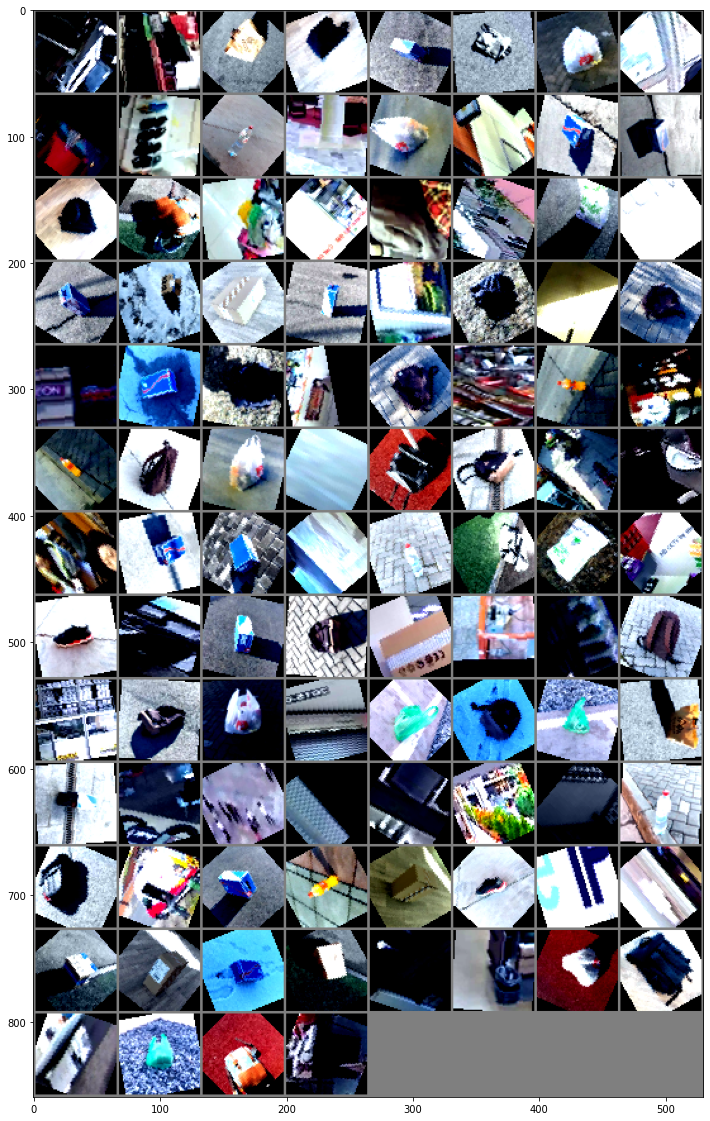

In [0]:
#Transformation for image
transform_train = transforms.Compose([transforms.Resize((64,64)),  
                                      transforms.RandomHorizontalFlip(),    
                                      transforms.RandomRotation(90),
                                      transforms.ToTensor(),                 
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])  #normalize the image

transform_val = transforms.Compose([transforms.Resize((64,64)),
                                    transforms.ToTensor(),                
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
#Load our dataset
train_dataset = datasets.ImageFolder(root = 'test_task/train',
                                     transform = transform_train)

test_dataset = datasets.ImageFolder(root = 'test_task/val',
                                    transform = transform_val)


#Make the dataset iterable
batch_size = 100
train_load = torch.utils.data.DataLoader(dataset = train_dataset, 
                                         batch_size = batch_size,
                                         shuffle = True)      #Shuffle to create a mixed batches of 100 of cat & dog images

test_load = torch.utils.data.DataLoader(dataset = test_dataset, 
                                         batch_size = batch_size,
                                         shuffle = False)
                                         
#Show a batch of images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_load)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))

In [0]:
# class MyModel(nn.Module):
#     def __init__(self):
#         super(MyModel,self).__init__()
        
#         self.cnn1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3,stride=1, padding=1)
#         self.batchnorm1 = nn.BatchNorm2d(8)        #Batch normalization
#         self.relu = nn.ReLU()                 #RELU Activation
#         self.maxpool1 = nn.MaxPool2d(kernel_size=2)   #Maxpooling reduces the size by kernel size. 64/2 = 32
        
#         self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
#         self.batchnorm2 = nn.BatchNorm2d(32)
#         self.maxpool2 = nn.MaxPool2d(kernel_size=2)    #Size now is 32/2 = 16
        
#         #Flatten the feature maps. You have 32 feature mapsfrom cnn2. Each of the feature is of size 16x16 --> 32*16*16 = 8192
#         self.fc1 = nn.Linear(in_features=8192, out_features=4000)   #Flattened image is fed into linear NN and reduced to half size
#         self.droput = nn.Dropout(p=0.5)                    #Dropout used to reduce overfitting
#         self.fc2 = nn.Linear(in_features=4000, out_features=2000)
#         self.droput = nn.Dropout(p=0.5)
#         self.fc3 = nn.Linear(in_features=2000, out_features=500)
#         self.droput = nn.Dropout(p=0.5)
#         self.fc4 = nn.Linear(in_features=500, out_features=50)
#         self.droput = nn.Dropout(p=0.5)
#         self.fc5 = nn.Linear(in_features=50, out_features=2)    #Since there were so many features, I decided to use 45 layers to get output layers. You can increase the kernels in Maxpooling to reduce image further and reduce number of hidden linear layers.
       
        
#     def forward(self,x):
#         out = self.cnn1(x)
#         out = self.batchnorm1(out)
#         out = self.relu(out)
#         out = self.maxpool1(out)
#         out = self.cnn2(out)
#         out = self.batchnorm2(out)
#         out = self.relu(out)
#         out = self.maxpool2(out)
#         #Flattening is done here with .view() -> (batch_size, 32*16*16) = (100, 8192)
#         out = out.view(-1,8192)   #-1 will automatically update the batchsize as 100; 8192 flattens 32,16,16
#         #Then we forward through our fully connected layer 
#         out = self.fc1(out)
#         out = self.relu(out)
#         out = self.droput(out)
#         out = self.fc2(out)
#         out = self.relu(out)
#         out = self.droput(out)
#         out = self.fc3(out)
#         out = self.relu(out)
#         out = self.droput(out)
#         out = self.fc4(out)
#         out = self.relu(out)
#         out = self.droput(out)
#         out = self.fc5(out)
#         return out
class MyModel(nn.Module):   
    def __init__(self, num_classes=5):
        super(MyModel,self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3,stride=1, padding=1)
        self.relu1 = nn.ReLU()
        
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
        self.lf = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)
    
    def forward(self, input):
        output = self.conv1(input)
        output = self.relu1(output)
        
        output = self.maxpool1(output)
        
        output = self.conv2(output)
        output = self.relu2(output)
        
        output = output.view(-1, 32 * 32 * 24)

        output = self.lf(output)

        return output

In [0]:
model=MyModel()
loss_function=nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.008)

In [19]:
# %%time
# import time

num_epochs = 20

#Define the lists to store the results of loss and accuracy
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

#Training
for epoch in range(num_epochs): 
    #Reset these below variables to 0 at the begining of every epoch
    #start = time.time()
    correct = 0
    iterations = 0
    iter_loss = 0.0
    
    model.train()                   # Put the network into training mode
    
    for i, (inputs, labels) in enumerate(train_load):
        
        # Convert torch tensor to Variable
        inputs = Variable(inputs)
        labels = Variable(labels)
        
        
        optimizer.zero_grad()            # Clear off the gradient in (w = w - gradient)
        outputs = model(inputs)         
        loss = loss_function(outputs, labels)  
        iter_loss += loss.item()       # Accumulate the loss
        loss.backward()                 # Backpropagation 
        optimizer.step()                # Update the weights
        
        # Record the correct predictions for training data 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().float()
        iterations += 1
    
    # Record the training loss
    train_loss.append(iter_loss/iterations)
    # Record the training accuracy
    train_accuracy.append((100*correct / len(train_dataset)))
   
    #Testing
    loss = 0.0
    correct = 0
    iterations = 0

    model.eval()                    # Put the network into evaluation mode
    
    for i, (inputs, labels) in enumerate(test_load):
        
        # Convert torch tensor to Variable
        inputs = Variable(inputs)
        labels = Variable(labels)
        
        
        outputs = model(inputs)     
        loss = loss_function(outputs, labels) # Calculate the loss
        loss += loss.item()
        # Record the correct predictions for training data
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().float()
        
        iterations += 1

    # Record the Testing loss
    test_loss.append(loss/iterations)
    # Record the Testing accuracy
    test_accuracy.append((100*correct / len(test_dataset)))
    #stop = time.time()
    
    print ('Epoch {}/{}, Training Loss: {:.5f}, Training Accuracy: {:.5f}, Testing Loss: {:.5f}, Testing Acc: {:.5f}'
           .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))


Epoch 1/20, Training Loss: 0.20693, Training Accuracy: 92.15147, Testing Loss: 0.06285, Testing Acc: 72.63582
Epoch 2/20, Training Loss: 0.17113, Training Accuracy: 93.77445, Testing Loss: 0.05844, Testing Acc: 69.89630
Epoch 3/20, Training Loss: 0.16890, Training Accuracy: 93.81329, Testing Loss: 0.05644, Testing Acc: 72.10958
Epoch 4/20, Training Loss: 0.13656, Training Accuracy: 94.96740, Testing Loss: 0.06411, Testing Acc: 67.97710
Epoch 5/20, Training Loss: 0.12829, Training Accuracy: 95.09779, Testing Loss: 0.04736, Testing Acc: 72.68225
Epoch 6/20, Training Loss: 0.13974, Training Accuracy: 94.86475, Testing Loss: 0.11083, Testing Acc: 67.38895
Epoch 7/20, Training Loss: 0.10985, Training Accuracy: 95.99944, Testing Loss: 0.14222, Testing Acc: 70.17490
Epoch 8/20, Training Loss: 0.18091, Training Accuracy: 93.44153, Testing Loss: 0.02443, Testing Acc: 70.51540
Epoch 9/20, Training Loss: 0.12559, Training Accuracy: 95.38078, Testing Loss: 0.05060, Testing Acc: 75.94800
Epoch 10/2

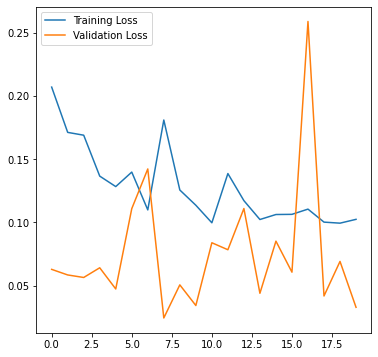

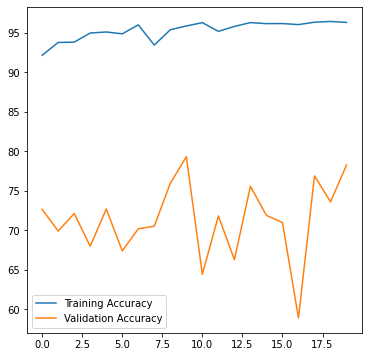

In [22]:
# Loss
f = plt.figure(figsize=(6, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.legend()
plt.show()

# Accuracy
f = plt.figure(figsize=(6, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()



In [0]:
#Run this if you want to save the model
torch.save(model.state_dict(),'weights.pth')

#Run this if you want to load the model
#model.load_state_dict(torch.load('weights.pth'))